### Никишев И.О. 224-321 Лабораторная работа №3 Оценка влияния источника излучения на координаты цвета
Цель

Изучить спектральные характеристики источников излучения и объектов, получить навыки расчета координат цвета.

При измерении с помощью спектрофотометра образцов цвета несамосветящихся объектов определяется апертурный спектральный коэффи1
циент 𝛽(𝜆), который характеризует свойство поверхности объекта избирательно поглощать и отражать световой поток в зависимости от длины
волны.
Поток излучения от объекта Φ(𝜆) определяющий цвет данного объекта, рассчитывается по формуле:

Φ(𝜆)∆𝜆 = 𝛽(𝜆)𝑆(𝜆)∆𝜆, (1)

где 𝑆(𝜆) — спектральное распределение энергии осветителя.

1. Написать функцию для расчета потока излучения от объекта Φ(𝜆)

In [21]:
dy = 5#mm
def light(sy, by, dy=5): #функцию для расчета потока излучения от объекта Φ(𝜆)
    """𝑆(𝜆) — спектральное распределение энергии осветителя."""
    return float(sy)*float(by)*float(dy)

import csv, numpy as np
with open('colorcheckerdata.csv') as f: #Отсюда берется S(y), для каждого цвета и для каждого 𝜆 (380,390,400...) своё Sy
    colorchecker = np.array(list(csv.reader(f, delimiter=',')))
    zones = {color:i-1 for i, color in enumerate(colorchecker[0])}
    colorchecker = {int(i[0].split('.')[0]):np.array(i[1:],dtype=float) for i in colorchecker[1:]}

def light_k(k, zone, syfile, dy=5, func=light): # функциz для расчета потока излучения от объекта Φ(𝜆), она берет by из colorcheckerdata.csv для конкретного цвета и числа 𝜆, и sy из illuminant ....csv для того же числа 𝜆.
    with open(syfile) as f:
        by = {int(i[0].split('.')[0]): np.array(i[1:],dtype=float) for i in np.array(list(csv.reader(f, delimiter=','))[1:])}
    return func(colorchecker[k][zones[zone]], by[k][0], dy)

print(light_k(380, 'green', 'illuminant A.csv')) # Φ(𝜆) для цвета green и источника illuminant A.csv

2.6936525


2. Написать функции для расчета координат 𝑋, 𝑌, 𝑍, 𝐿*, 𝑎*
, 𝑏* и
𝑅, 𝐺, 𝐵 в цветовом пространстве sRGB.

Для определения координат 𝑋, 𝑌 , 𝑍 необходимо рассчитать произведение Φ(𝜆) и ординат кривых сложения 𝑥¯(𝜆), 𝑦¯(𝜆), 𝑧¯(𝜆) для стандартного
колориметрического наблюдателя, а затем вычислить необходимые координаты

3. Считать данные спектральных распределений из текстовых файлов
для полей тест-объекта ColorChecker, источников света, а также
кривых сложения.

In [22]:
with open('CIE_xyz_1931_2deg_5nm.csv') as f: # файл  кривыми 𝑥¯(𝜆), 𝑦¯(𝜆), 𝑧¯(𝜆) для стандартного колориметрического наблюдателя
    CIE_xyz_1931_2deg_5nm = {int(i[0].split('.')[0]):np.array(i[1:], dtype=float) for i in np.array(list(csv.reader(f, delimiter=',')))}

def xyz1(zone, syfile, coord, func=light):
    k = 100/sum([light_k(k, zone, syfile, func=func)*CIE_xyz_1931_2deg_5nm[k][1] for k in range(380, 729, 10)])
#
 3   print(k*sum([light_k(k, zone, syfile, func=func)*CIE_xyz_1931_2deg_5nm[k][coord] for k in range(380, 729, 10)]))
    return k*sum([light_k(k, zone, syfile, func=func)*CIE_xyz_1931_2deg_5nm[k][coord] for k in range(380, 729, 10)])

def xyz(zone, syfile, func=light): return xyz1(zone, syfile,0 ,func), xyz1(zone, syfile,1  ,func), xyz1(zone, syfile,2  ,func) #расчёт XYZ для источника излучения

def f(t): # f из формулы расчёта f из задания
    if t>(6/29)**3: return t**(1/3)
    else: return (1/3)*(29/6)**2 * t + (4/29)

def Lab(X, Y, Z, Xn, Yn, Zn): # формула расчёта Lab из задания 
    L = 116 * f(Y/Yn) - 16
    a = 500 * (f(X/Xn) - f(Y/Yn))
    b = 200 * (f(Y/Yn) - f(Z/Zn))
    return L, a, b

def RGB(X, Y, Z): # формула расчёта RGB из задания 
    return np.clip(np.array([[3.2404542, -1.5371385, -0.4985314],[-0.9692660, 1.8760108, 0.0415560], [0.0556434, -0.2040259, 1.0572252]]) @ np.array([X, Y, Z]), 0, 255)

вычисление координат белого

Для расчета 𝑋𝑛, 𝑌𝑛, 𝑍𝑛 используйте формулу 1, только в этом случае
𝑆(𝜆) = 0. И необходимо полученные 𝑋, 𝑌, 𝑍 умножить на 100 и разделить
на 𝑌 для нормализации.


In [23]:
def whitelight(sy, by, dy=5): # В задании неправильно надо 𝑆(𝜆) = 0
    return float(1)*float(by)*float(dy)
xyzwhite = lambda syfile: xyz('red', syfile, whitelight) # red не на что не влияет т.к 𝑆(𝜆) всегда 1
# для illuminant D65.csv координата - Xn= 95.04, Yn = 100, Zn=108.88 (источник https://www.wikiwand.com/en/Illuminant_D65)
# демнострация функции  для illuminant D65.csv:
print(xyzwhite('illuminant D65.csv'))

0.01892618522895851
95.00561642923921
0.01892618522895851
100.00000000000001
0.01892618522895851
108.81980922569113
(95.00561642923921, 100.00000000000001, 108.81980922569113)


4. Для любых четырех полей тест-объекта ColorChecker рассчитать
координаты 𝑋, 𝑌, 𝑍, 𝐿*
, 𝑎*
, 𝑏* и 𝑅, 𝐺, 𝐵 по трем любым источникам
света

Тест объект - illuminant D65.csv, поле - foliage;
0.14576907199053402
77.77196143219703
0.14576907199053402
100.0
0.14576907199053402
51.48558142678038
XYZ = (77.77196143219703, 100.0, 51.48558142678038)
0.01892618522895851
95.00561642923921
0.01892618522895851
100.00000000000001
0.01892618522895851
108.81980922569113
XYZ стандартного белого: (95.00561642923921, 100.00000000000001, 108.81980922569113)
0.14576907199053402
77.77196143219703
0.14576907199053402
100.0
0.14576907199053402
51.48558142678038
0.01892618522895851
95.00561642923921
0.01892618522895851
100.00000000000001
0.01892618522895851
108.81980922569113
Lab = (100.0, -32.27067986674093, 44.156312356118235)
0.14576907199053402
77.77196143219703
0.14576907199053402
100.0
0.14576907199053402
51.48558142678038
RGB = [ 72.63545008 114.35889685  38.35676048]
0.14576907199053402
77.77196143219703
0.14576907199053402
100.0
0.14576907199053402
51.48558142678038
0.14576907199053402
77.77196143219703
0.14576907199053402
100.0
0.145769

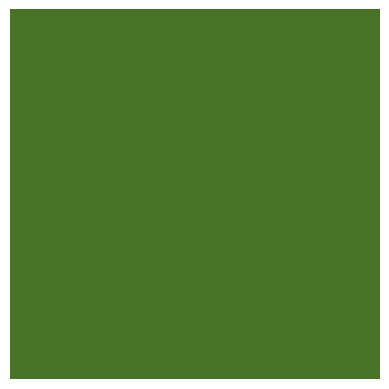

In [24]:
labcolors = {'foliage': [], 'blue':[],'orange yellow':[],'cyan':[]}
def do(zone, file): # СОВЕТУЮ СДЕЛАТЬ СРАЗУ ТАБЛИЦУ КТО УМЕЕТ Я НЕ УМЕЮ ПОЭТОМУ Я КАЖДЫЙ ЦВЕТ ОТДЕЛЬНО ВЫВОДИЛ И ПОТОМ В ТАБЛИЦУ ВСТАВЛЯЛ СКРИНШОТЫ
    print(f'Тест объект - {file}, поле - {zone};')
    print(f'XYZ = {xyz(zone, file)}')
    print(f'XYZ стандартного белого: {xyzwhite(file)}')
    print(f'Lab = {Lab(*xyz(zone, file), *xyzwhite(file))}')
    print(f'RGB = {RGB(*xyz(zone, file))}')
    import matplotlib.pyplot as plt
    plt.axis('off')
    plt.imshow([[[int(i) for i in RGB(*xyz(zone, file))]]])
    global labcolors
    labcolors[zone].append(Lab(*xyz(zone, file), *xyzwhite(file)))

d65foliage = do('foliage', 'illuminant D65.csv')

Тест объект - illuminant D65.csv, поле - blue;
0.30386545938474213
135.0042069650853
0.30386545938474213
100.0
0.30386545938474213
481.6645685540324
XYZ = (135.0042069650853, 100.0, 481.6645685540324)
0.01892618522895851
95.00561642923921
0.01892618522895851
100.00000000000001
0.01892618522895851
108.81980922569113
XYZ стандартного белого: (95.00561642923921, 100.00000000000001, 108.81980922569113)
0.30386545938474213
135.0042069650853
0.30386545938474213
100.0
0.30386545938474213
481.6645685540324
0.01892618522895851
95.00561642923921
0.01892618522895851
100.00000000000001
0.01892618522895851
108.81980922569113
Lab = (100.0, 62.12902679506038, -128.37915108188324)
0.30386545938474213
135.0042069650853
0.30386545938474213
100.0
0.30386545938474213
481.6645685540324
RGB = [ 43.63618779  76.76214514 255.        ]
0.30386545938474213
135.0042069650853
0.30386545938474213
100.0
0.30386545938474213
481.6645685540324
0.30386545938474213
135.0042069650853
0.30386545938474213
100.0
0.303865459

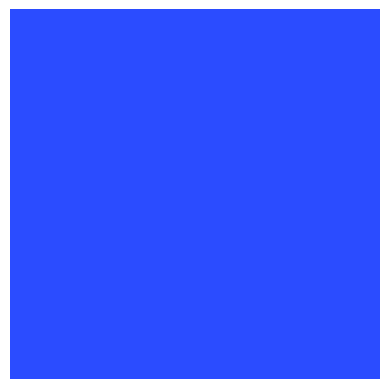

In [25]:
do('blue', 'illuminant D65.csv')

Тест объект - illuminant D65.csv, поле - orange yellow;
0.04388603192357711
107.03392773131154
0.04388603192357711
100.0
0.04388603192357711
19.48095868639945
XYZ = (107.03392773131154, 100.0, 19.48095868639945)
0.01892618522895851
95.00561642923921
0.01892618522895851
100.00000000000001
0.01892618522895851
108.81980922569113
XYZ стандартного белого: (95.00561642923921, 100.00000000000001, 108.81980922569113)
0.04388603192357711
107.03392773131154
0.04388603192357711
100.0
0.04388603192357711
19.48095868639945
0.01892618522895851
95.00561642923921
0.01892618522895851
100.00000000000001
0.01892618522895851
108.81980922569113
Lab = (100.0, 20.268340018058883, 87.28091604094641)
0.04388603192357711
107.03392773131154
0.04388603192357711
100.0
0.04388603192357711
19.48095868639945
RGB = [183.41282105  84.66628372   6.1489021 ]
0.04388603192357711
107.03392773131154
0.04388603192357711
100.0
0.04388603192357711
19.48095868639945
0.04388603192357711
107.03392773131154
0.04388603192357711
100

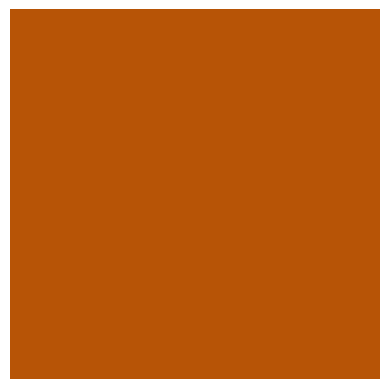

In [26]:
do('orange yellow', 'illuminant D65.csv')

Тест объект - illuminant D65.csv, поле - cyan;
0.09525576711436716
72.85180704229033
0.09525576711436716
100.0
0.09525576711436716
198.871941390961
XYZ = (72.85180704229033, 100.0, 198.871941390961)
0.01892618522895851
95.00561642923921
0.01892618522895851
100.00000000000001
0.01892618522895851
108.81980922569113
XYZ стандартного белого: (95.00561642923921, 100.00000000000001, 108.81980922569113)
0.09525576711436716
72.85180704229033
0.09525576711436716
100.0
0.09525576711436716
198.871941390961
0.01892618522895851
95.00561642923921
0.01892618522895851
100.00000000000001
0.01892618522895851
108.81980922569113
Lab = (100.0, -42.34976767847976, -44.52232321257994)
0.09525576711436716
72.85180704229033
0.09525576711436716
100.0
0.09525576711436716
198.871941390961
RGB = [  0.         125.25262279 193.90356025]
0.09525576711436716
72.85180704229033
0.09525576711436716
100.0
0.09525576711436716
198.871941390961
0.09525576711436716
72.85180704229033
0.09525576711436716
100.0
0.09525576711436

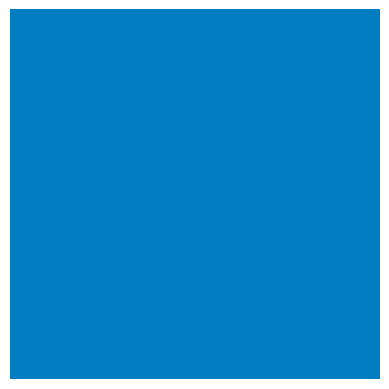

In [27]:
do('cyan', 'illuminant D65.csv')

Тест объект - illuminant D50.csv, поле - foliage;
0.14683851445990828
80.5655418395614
0.14683851445990828
100.00000000000001
0.14683851445990828
39.701631872324526
XYZ = (80.5655418395614, 100.00000000000001, 39.701631872324526)
0.019038934882892627
96.37625947341529
0.019038934882892627
100.0
0.019038934882892627
82.45677088734121
XYZ стандартного белого: (96.37625947341529, 100.0, 82.45677088734121)
0.14683851445990828
80.5655418395614
0.14683851445990828
100.00000000000001
0.14683851445990828
39.701631872324526
0.019038934882892627
96.37625947341529
0.019038934882892627
100.0
0.019038934882892627
82.45677088734121
Lab = (100.0, -28.990399281220714, 43.24405977912056)
0.14683851445990828
80.5655418395614
0.14683851445990828
100.00000000000001
0.14683851445990828
39.701631872324526
RGB = [ 87.56258831 111.16148054  26.05391637]
0.14683851445990828
80.5655418395614
0.14683851445990828
100.00000000000001
0.14683851445990828
39.701631872324526
0.14683851445990828
80.5655418395614
0.1468

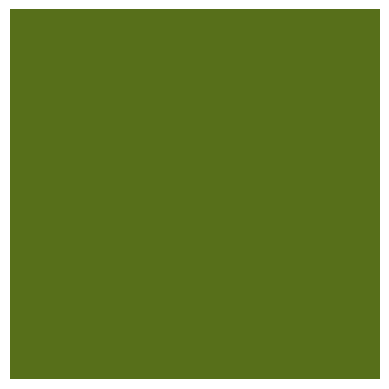

In [28]:
do('foliage', 'illuminant D50.csv')

Тест объект - illuminant D50.csv, поле - blue;
0.32236926910452174
123.98171545925325
0.32236926910452174
100.0
0.32236926910452174
383.1852275881205
XYZ = (123.98171545925325, 100.0, 383.1852275881205)
0.019038934882892627
96.37625947341529
0.019038934882892627
100.0
0.019038934882892627
82.45677088734121
XYZ стандартного белого: (96.37625947341529, 100.0, 82.45677088734121)
0.32236926910452174
123.98171545925325
0.32236926910452174
100.0
0.32236926910452174
383.1852275881205
0.019038934882892627
96.37625947341529
0.019038934882892627
100.0
0.019038934882892627
82.45677088734121
Lab = (100.0, 43.79164315714901, -133.75220264079292)
0.32236926910452174
123.98171545925325
0.32236926910452174
100.0
0.32236926910452174
383.1852275881205
RGB = [ 57.01335261  83.3534639  255.        ]
0.32236926910452174
123.98171545925325
0.32236926910452174
100.0
0.32236926910452174
383.1852275881205
0.32236926910452174
123.98171545925325
0.32236926910452174
100.0
0.32236926910452174
383.1852275881205
0.0

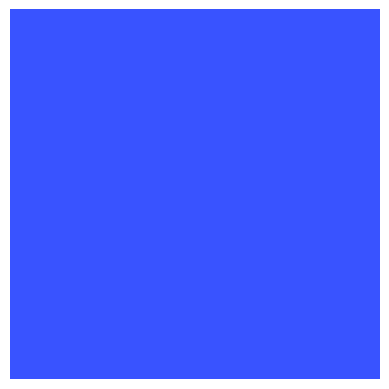

In [29]:
do('blue', 'illuminant D50.csv')

Тест объект - illuminant D50.csv, поле - orange yellow;
0.04264836094261774
111.55671280203336
0.04264836094261774
100.0
0.04264836094261774
14.60104500335069
XYZ = (111.55671280203336, 100.0, 14.60104500335069)
0.019038934882892627
96.37625947341529
0.019038934882892627
100.0
0.019038934882892627
82.45677088734121
XYZ стандартного белого: (96.37625947341529, 100.0, 82.45677088734121)
0.04264836094261774
111.55671280203336
0.04264836094261774
100.0
0.04264836094261774
14.60104500335069
0.019038934882892627
96.37625947341529
0.019038934882892627
100.0
0.019038934882892627
82.45677088734121
Lab = (100.0, 24.98297344331146, 87.6906618903643)
0.04264836094261774
111.55671280203336
0.04264836094261774
100.0
0.04264836094261774
14.60104500335069
RGB = [200.50148913  80.07971224   1.24139752]
0.04264836094261774
111.55671280203336
0.04264836094261774
100.0
0.04264836094261774
14.60104500335069
0.04264836094261774
111.55671280203336
0.04264836094261774
100.0
0.04264836094261774
14.601045003350

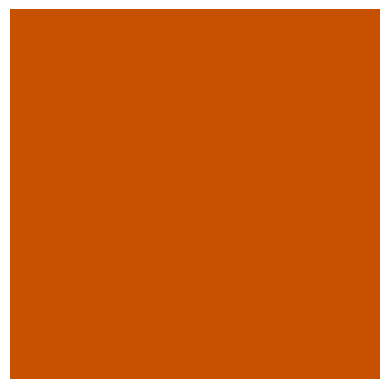

In [30]:
do('orange yellow', 'illuminant D50.csv')

Тест объект - illuminant D50.csv, поле - cyan;
0.10058509832087179
70.36873469362777
0.10058509832087179
100.0
0.10058509832087179
160.23552469177346
XYZ = (70.36873469362777, 100.0, 160.23552469177346)
0.019038934882892627
96.37625947341529
0.019038934882892627
100.0
0.019038934882892627
82.45677088734121
XYZ стандартного белого: (96.37625947341529, 100.0, 82.45677088734121)
0.10058509832087179
70.36873469362777
0.10058509832087179
100.0
0.10058509832087179
160.23552469177346
0.019038934882892627
96.37625947341529
0.019038934882892627
100.0
0.019038934882892627
82.45677088734121
Lab = (100.0, -49.76433304733446, -49.57868387024034)
0.10058509832087179
70.36873469362777
0.10058509832087179
100.0
0.10058509832087179
160.23552469177346
RGB = [  0.         126.05380546 152.91800029]
0.10058509832087179
70.36873469362777
0.10058509832087179
100.0
0.10058509832087179
160.23552469177346
0.10058509832087179
70.36873469362777
0.10058509832087179
100.0
0.10058509832087179
160.23552469177346
0.0

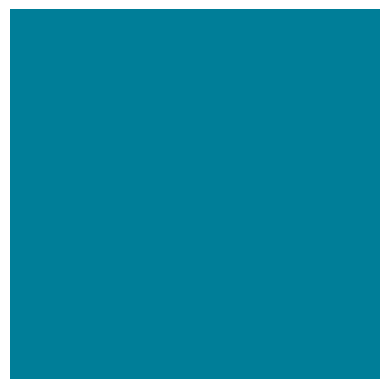

In [31]:
do('cyan', 'illuminant D50.csv')

Тест объект - illuminant LED-B3.csv, поле - foliage;
1.0523495844919424
84.92708714652198
1.0523495844919424
100.0
1.0523495844919424
32.21471946269712
XYZ = (84.92708714652198, 100.0, 32.21471946269712)
0.13659157214959738
100.86000721458791
0.13659157214959738
100.0
0.13659157214959738
67.61471488514103
XYZ стандартного белого: (100.86000721458791, 100.0, 67.61471488514103)
1.0523495844919424
84.92708714652198
1.0523495844919424
100.0
1.0523495844919424
32.21471946269712
0.13659157214959738
100.86000721458791
0.13659157214959738
100.0
0.13659157214959738
67.61471488514103
Lab = (100.0, -27.850991190586814, 43.79280283997935)
1.0523495844919424
84.92708714652198
1.0523495844919424
100.0
1.0523495844919424
32.21471946269712
RGB = [105.42843704 106.62285683  18.38125511]
1.0523495844919424
84.92708714652198
1.0523495844919424
100.0
1.0523495844919424
32.21471946269712
1.0523495844919424
84.92708714652198
1.0523495844919424
100.0
1.0523495844919424
32.21471946269712
0.13659157214959738
1

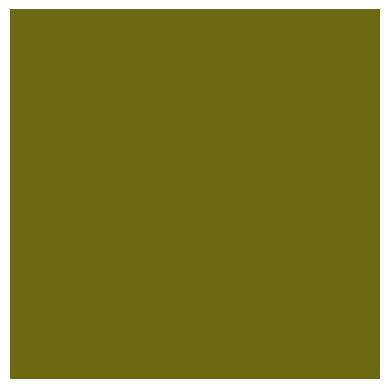

In [32]:
do('foliage', 'illuminant LED-B3.csv')

Тест объект - illuminant LED-B3.csv, поле - blue;
2.541499044377555
134.34380234988515
2.541499044377555
100.0
2.541499044377555
368.0383225397427
XYZ = (134.34380234988515, 100.0, 368.0383225397427)
0.13659157214959738
100.86000721458791
0.13659157214959738
100.0
0.13659157214959738
67.61471488514103
XYZ стандартного белого: (100.86000721458791, 100.0, 67.61471488514103)
2.541499044377555
134.34380234988515
2.541499044377555
100.0
2.541499044377555
368.0383225397427
0.13659157214959738
100.86000721458791
0.13659157214959738
100.0
0.13659157214959738
67.61471488514103
Lab = (100.0, 50.13534887667947, -151.81466305286037)
2.541499044377555
134.34380234988515
2.541499044377555
100.0
2.541499044377555
368.0383225397427
RGB = [ 98.14242838  72.6804006  255.        ]
2.541499044377555
134.34380234988515
2.541499044377555
100.0
2.541499044377555
368.0383225397427
2.541499044377555
134.34380234988515
2.541499044377555
100.0
2.541499044377555
368.0383225397427
0.13659157214959738
100.860007214

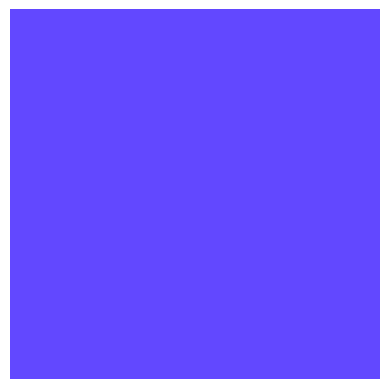

In [33]:
do('blue', 'illuminant LED-B3.csv')

Тест объект - illuminant LED-B3.csv, поле - orange yellow;
0.28879331626652993
112.9760828152064
0.28879331626652993
100.0
0.28879331626652993
10.98993044164365
XYZ = (112.9760828152064, 100.0, 10.98993044164365)
0.13659157214959738
100.86000721458791
0.13659157214959738
100.0
0.13659157214959738
67.61471488514103
XYZ стандартного белого: (100.86000721458791, 100.0, 67.61471488514103)
0.28879331626652993
112.9760828152064
0.28879331626652993
100.0
0.28879331626652993
10.98993044164365
0.13659157214959738
100.86000721458791
0.13659157214959738
100.0
0.13659157214959738
67.61471488514103
Lab = (100.0, 19.26913620812021, 90.85230469122394)
0.28879331626652993
112.9760828152064
0.28879331626652993
100.0
0.28879331626652993
10.98993044164365
RGB = [206.90114665  78.55390166   0.        ]
0.28879331626652993
112.9760828152064
0.28879331626652993
100.0
0.28879331626652993
10.98993044164365
0.28879331626652993
112.9760828152064
0.28879331626652993
100.0
0.28879331626652993
10.98993044164365
0.

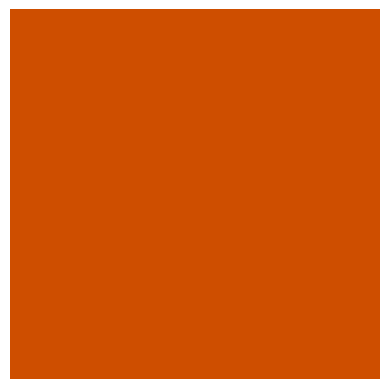

In [34]:
do('orange yellow', 'illuminant LED-B3.csv')

Тест объект - illuminant LED-B3.csv, поле - cyan;
0.7987446248348214
76.96345839442378
0.7987446248348214
100.0
0.7987446248348214
142.76912138622112
XYZ = (76.96345839442378, 100.0, 142.76912138622112)
0.13659157214959738
100.86000721458791
0.13659157214959738
100.0
0.13659157214959738
67.61471488514103
XYZ стандартного белого: (100.86000721458791, 100.0, 67.61471488514103)
0.7987446248348214
76.96345839442378
0.7987446248348214
100.0
0.7987446248348214
142.76912138622112
0.13659157214959738
100.86000721458791
0.13659157214959738
100.0
0.13659157214959738
67.61471488514103
Lab = (100.0, -43.09575015764844, -56.582885150183415)
0.7987446248348214
76.96345839442378
0.7987446248348214
100.0
0.7987446248348214
142.76912138622112
RGB = [ 24.50782204 118.93593014 134.81903141]
0.7987446248348214
76.96345839442378
0.7987446248348214
100.0
0.7987446248348214
142.76912138622112
0.7987446248348214
76.96345839442378
0.7987446248348214
100.0
0.7987446248348214
142.76912138622112
0.136591572149597

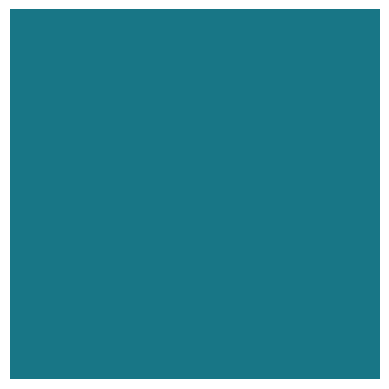

In [35]:
do('cyan', 'illuminant LED-B3.csv')

По координатам 𝐿*
, 𝑎*
, 𝑏* рассчитать цветовое различие ∆𝐸76.

4. Таблица с цветовыми различиями ∆𝐸76 для полей тест-объекта при
разных источника света:

In [36]:
def e76(lab1, lab2):
    l1, a1, b1 = lab1
    l2, a2, b2 = lab2
    return round(((l1 - l2) ** 2 + (a1 - a2) ** 2 + (b1 - b2) ** 2)**(0.5), 2)
def table(color):
    global labcolors
    colors = labcolors[color]
    print('Цвет -', color)
    from prettytable import PrettyTable
    x = PrettyTable()
    x.field_names = [f'∆𝐸76 для\nцвета `{color}`', "D50", "D65", "LED-B3"]
    x.add_row(['D50', '-', e76(colors[1], colors[0]), e76(colors[1],colors[2])])
    x.add_row(['D65', e76(colors[0], colors[1]),'-', e76(colors[0],colors[2])])
    x.add_row(['LED-B3', e76(colors[2], colors[0]), e76(colors[2],colors[1]), '-'])
    return x
table('foliage')

Цвет - foliage


∆𝐸76 дляцвета `foliage`,D50,D65,LED-B3
D50,-,3.4,1.26
D65,3.4,-,4.43
LED-B3,4.43,1.26,-


In [37]:
table('blue')

Цвет - blue


∆𝐸76 дляцвета `blue`,D50,D65,LED-B3
D50,-,19.11,19.14
D65,19.11,-,26.33
LED-B3,26.33,19.14,-


In [38]:
table('orange yellow')

Цвет - orange yellow


∆𝐸76 дляцвета `orange yellow`,D50,D65,LED-B3
D50,-,4.73,6.53
D65,4.73,-,3.71
LED-B3,3.71,6.53,-


In [39]:
table('cyan')

Цвет - cyan


∆𝐸76 дляцвета `cyan`,D50,D65,LED-B3
D50,-,8.97,9.67
D65,8.97,-,12.08
LED-B3,12.08,9.67,-


# Отчёт 
Используя координаты 𝑅, 𝐺, 𝐵 составить изображение с отображением полей:

<img src="Отчёт.png">

## Выводы по работе: :

влияет ли освещение на воспринимаемый цвет: По выполненной работе можно сделать вывод о том, что освещение влияет на воспринимаемый цвет, т.к. для разных источников света поля тест-объекта различаются как визуально, так и согласно параметрам ∆𝐸76.

возможна ли ситуация, при которой объекты при одном освещение
будут восприниматься одинаково, а при другом — по разному: такое возможно с учётом особенностей восприятия человека и ограничений, связанных с восприятием схожих цветов. В частности, при освещении цвета объектов могут сблизиться настолько, что разница между ними не будет воспринимаема, однако при другом освещении эта разница может быть усилена до такой степени, что она может быть воспринята. В проделанной работе цветов, разница между которыми неразличима, не было, однако были схожие цвета, например, можно заметить, что визуальная разница между цветами Cyan и blue для источника освещения D65 меньше, чем у источников D50 и LED-B3. Таким образом, если рассматривать изначально более схожие цвета, подобная ситуация может возникнуть с цветами, разница между которыми визуально не различима для одного источника и различима для другого.